In [27]:
import numpy as np
from scipy.integrate import quad
import matplotlib.pyplot as plt
import matplotlib 
matplotlib.rcParams['figure.dpi'] = 150

## basics

- https://blog.csdn.net/jteng/article/details/54344766

- monte carlo （计算机随机采样）的方式估计未知（不知解析解）分布

$$
p(accept)=\displaystyle\int{\dfrac{\tilde{p}(z)}{kq(z)}}q(z)dz = \dfrac{1}{k} \int{\tilde{p}(z)}dz
$$

- $\tilde {p}(z)$: 为原始分布
    - $p(z)=\frac{1}{z_p}\tilde {p}(z)$ 对原始分布的归一化
- $q(z)$：为参考分布（proposal distribution）
- $kq(z)\geq \tilde p(z), \frac{\tilde p(z)}{kq(z)}\leq 1$

$$
\begin{split}
&\tilde{p}(z)=0.3\exp(-(z-0.3)^2)+0.7\exp(-(z-2)^2/0.3)\\
&q(z)=\mathcal N(1.4, 1.2)\\
\end{split}
$$

In [54]:
def tilde_pz(z):
    return 0.3*np.exp(-(z-0.3)**2) + 0.7 * np.exp(-(z-2)**2/0.3)
zp =  quad(tilde_pz, -np.inf, np.inf)[0]
def pz(z, zp=zp):
    return tilde_pz(z)/zp

In [48]:
loc = 1.4
scale = 1.2 
sample_size = int(1e7)
sample_z = np.random.normal(loc=loc, scale=scale, size=(sample_size, ))
# pdf
sample_qz = 1/(np.sqrt(2*np.pi)*scale) * np.exp(-0.5*(sample_z - loc)**2/scale**2)

In [23]:
k = 2.5

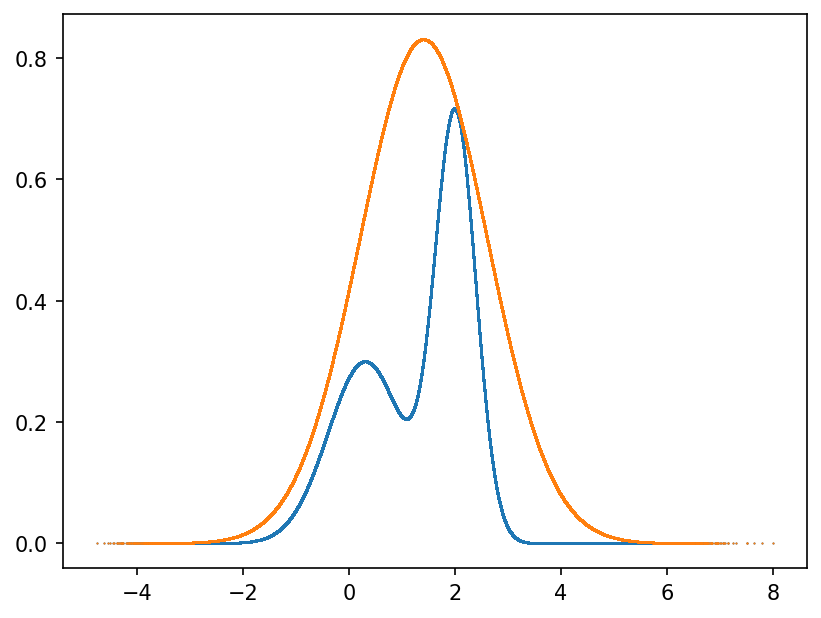

In [63]:
plt.scatter(sample_z, tilde_pz(sample_z), s=1, lw=0)
plt.scatter(sample_z, k*sample_qz, s=1, lw=0)

In [50]:
u = np.random.uniform(low=0, high=k*sample_qz, size=(sample_size, ))
samples = sample_z[u <= tilde_pz(sample_z)]

In [59]:
pz(sample_z)

array([0.58940822, 0.18070913, 0.17263262, ..., 0.52160871, 0.46361175,
       0.47512383])

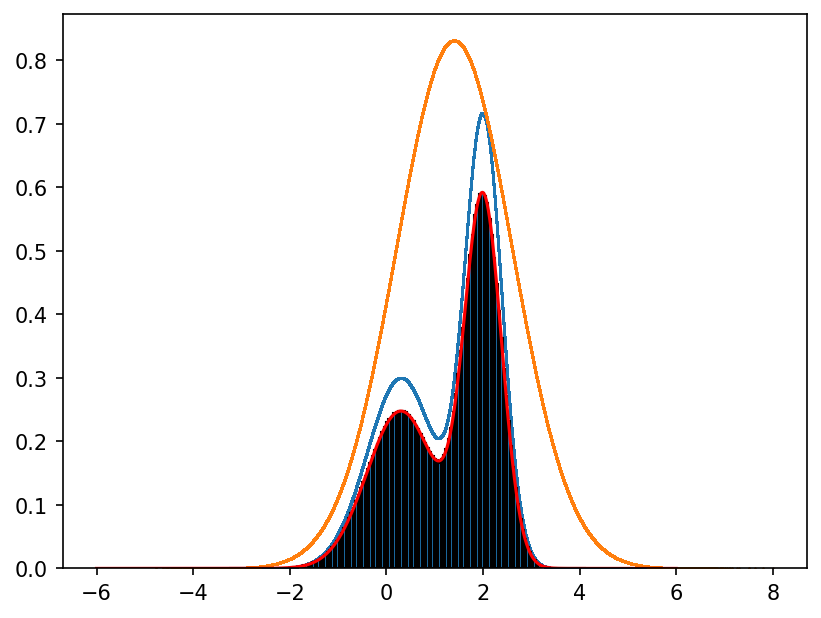

In [61]:
plt.scatter(sample_z, tilde_pz(sample_z), s=1, lw=0)
plt.scatter(sample_z, k*sample_qz, s=1, lw=0)
xs = np.linspace(-6, 6, 10000)
plt.plot(xs, pz(xs), c='r')
_ = plt.hist(samples, bins=150, density=True, edgecolor='black')